In [34]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plote

%matplotlib inline

plt.style.use('ggplot')


In [2]:
xtrain = pd.read_csv("../input/Diabetes_XTrain.csv")
ytrain = pd.read_csv("../input/Diabetes_YTrain.csv")
xtext = pd.read_csv("../input/Diabetes_Xtest.csv")


In [3]:
xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [4]:
xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [5]:
ytrain.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [6]:
xtrain.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [7]:
xtrain.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

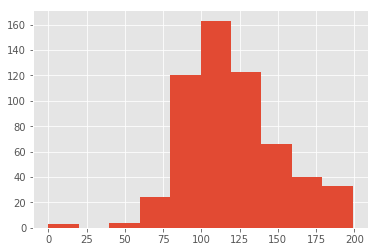

In [8]:
xtrain['Glucose'].hist()

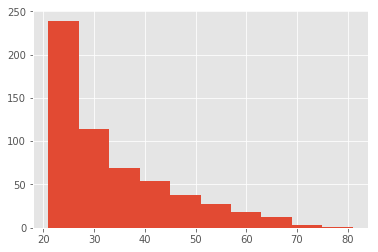

In [9]:
xtrain['Age'].hist()

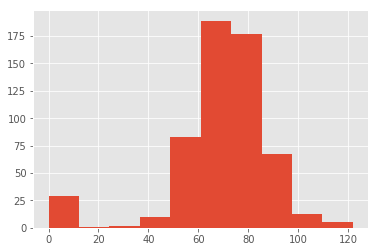

In [10]:
xtrain['BloodPressure'].hist()

In [11]:
df = xtrain.join(ytrain)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,0,0,27.8,0.237,58,0
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0


In [13]:
# Check For the Correlation
corr=df.corr()["Outcome"]
corr[np.argsort(corr, axis=0)[::-1]]

Outcome                     1.000000
Glucose                     0.473483
BMI                         0.311717
Pregnancies                 0.213015
Age                         0.204733
DiabetesPedigreeFunction    0.179672
Insulin                     0.141941
BloodPressure               0.072045
SkinThickness               0.067829
Name: Outcome, dtype: float64

In [14]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]

In [15]:
print(x.head())
print(x.shape)

print('\n\n')

print(y.head())
print(y.shape)

   Pregnancies  Glucose  BloodPressure ...    BMI  DiabetesPedigreeFunction  Age
0            7      168             88 ...   38.2                     0.787   40
1            8      110             76 ...   27.8                     0.237   58
2            7      147             76 ...   39.4                     0.257   43
3            2      100             66 ...   32.9                     0.867   28
4            4      129             86 ...   35.1                     0.231   23

[5 rows x 8 columns]
(576, 8)



0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64
(576,)


In [16]:
targetfet = y

features = x
print(targetfet.shape,'\n')
print(features.shape)

(576,) 

(576, 8)


In [17]:
####Prediction model########
#Train-Test split
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(features, targetfet, test_size = 0.2, random_state = 42)

print(data_train.shape,'\n')
print(data_test.shape,'\n')
print(label_train.shape,'\n')
print(label_test.shape,'\n')

(460, 8) 

(116, 8) 

(460,) 

(116,) 



In [18]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(data_train, label_train)
logis_score_train = logis.score(data_train, label_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(data_test, label_test)
print("Testing score: ",logis_score_test)


Training score:  0.7782608695652173
Testing score:  0.8103448275862069


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
## Checking the Accuracy 

#Prediction using test data
label_pred = logis.predict(data_test)
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(label_test, label_pred))
# evaluate predictions
accuracy = metrics.accuracy_score(label_test, label_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.8103448275862069
Accuracy: 81.03%


In [24]:
label_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0])

In [25]:
np.savetxt('Predicted Solution.csv',label_pred)

In [35]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_clf=KNeighborsClassifier(n_neighbors=10)
# knn_clf.fit(data_train,label_train)
# label_pred_knn = knn_clf.predict(data_test)
# accuracy_knn=knn_clf.score(label_test,label_pred_knn)
# print(accuracy_knn)

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, data_train, label_train, cv=3)
knn_mean = knn_scores.mean()
print(knn_mean)

0.6935805422647529


In [43]:
knn_clf.fit(data_train, label_train)
#Prediction using test data
label_pred_knn = knn_clf.predict(data_test)
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(label_test, label_pred_knn))
# evaluate predictions
accuracy = metrics.accuracy_score(label_test, label_pred_knn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.6982758620689655
Accuracy: 69.83%


In [39]:
# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, data_train, label_train, cv=2)
log_reg_mean = log_scores.mean()
print(log_reg_mean)

0.7434356036976124


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
log_reg.fit(data_train, label_train)
#Prediction using test data
label_pred_lr = log_reg.predict(data_test)
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(label_test, label_pred_lr))
# evaluate predictions
accuracy = metrics.accuracy_score(label_test, label_pred_lr)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.8103448275862069
Accuracy: 81.03%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
